

##                         RECOGNITION OF KANNADA HANDWRITTEN NUMERALS



THIS IS A MINI PROJECT DONE UNDER THE GUIDANCE OF Dr.R.Aparna,Professor, Department of Information Science,SIT

####                    An attept is made in this project to devolop a convolution neural network which can recognize written kannada                                                                                               digits.

## The steps followed while developing model
    1)Importing required python libraries
    2)Loading MNIST Dataset
    3)Preprocessing the dataset
    4)Devoloping the CNN Model
    5)Traing and Testing the Model
    6)User Interface

## IMPORTING LIBRARIES

In [2]:
!pip install gradio

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

## LOADING MNIST DATASET
#### The dataset is taken from www.kaggle.com

In [4]:
df_train = pd.read_csv('K_train.csv')

In [5]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### VISUALIZING THE RAW DATA

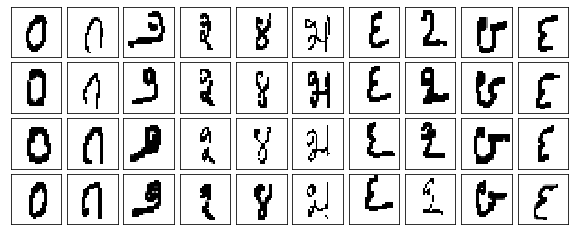

In [6]:
x = df_train.loc[:,'pixel0':].values
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [7]:
df_val = pd.read_csv('Dig-MNIST.csv')

In [8]:
df_val

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test = pd.read_csv('k_test.csv')

In [10]:
df_test

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PREPROCESSING THE DATASET

#### Dropping the label column from the features matrix and defining label to be predicted

In [11]:
img_size = 28
n_channels = 1
df_train = df_train.append(df_val)
X_train = df_train.drop(['label'], axis = 1) 
y_train = df_train['label']
X_pred = df_test.drop(['id'], axis = 1)


#### Splitting the dataset into Training and Testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size =0.1) # validation set = 10 %

#### Normalizing Images

In [13]:
X_train, X_test, X_pred = X_train.apply(lambda x: x/255), X_test.apply(lambda x: x/255), X_pred.apply(lambda x: x/255)
y_train, y_test = pd.get_dummies(y_train), pd.get_dummies(y_test)

#### Reshaping Images

In [14]:
X_train = X_train.values.reshape(-1, img_size, img_size, n_channels)
X_test = X_test.values.reshape(-1, img_size, img_size, n_channels)
y_train = y_train.to_numpy()

In [15]:
datagenerator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=8,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.15,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None )

datagenerator.fit(X_train)

## DEFINING THE CNN MODEL

#### MLP WITH CNN

In [16]:
# MLP with CNN
model = Sequential()  

# Feature Learning

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  # pooling layer 1
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  # pooling layer 2
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu'))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  # pooling layer 3
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu'))
model.add(Dropout(rate=0.5))

#### CLASSIFICATION

In [17]:
model.add(Flatten())

model.add(Dense(128, activation="relu"))  # Fully connected layer
model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu")) # Fully connected layer
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax")) # Output layer / Classifier

#### MODEL COMPILATION

In [18]:
model.compile(optimizer="adam", loss=['categorical_crossentropy'], metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### TRAINING AND TESTING

In [19]:
batch_size=128
epochs = 20

history = model.fit_generator(datagenerator.flow(X_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

C:\Users\chaya\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
493/493 [==============================] - 263s 530ms/step - loss: 1.9132 - accuracy: 0.2972 - val_loss: 0.2141 - val_accuracy: 0.9458
Epoch 2/20
493/493 [==============================] - 292s 592ms/step - loss: 0.2562 - accuracy: 0.9395 - val_loss: 0.1779 - val_accuracy: 0.9544
Epoch 3/20
493/493 [==============================] - 274s 555ms/step - loss: 0.1564 - accuracy: 0.9635 - val_loss: 0.0988 - val_accuracy: 0.9779
Epoch 4/20
493/493 [==============================] - 295s 598ms/step - loss: 0.1334 - accuracy: 0.9705 - val_loss: 0.0919 - val_accuracy: 0.9816
Epoch 5/20
493/493 [==============================] - 324s 657ms/step - loss: 0.1200 - accuracy: 0.9744 - val_loss: 0.0503 - val_accuracy: 0.9863
Epoch 6/20
493/493 [==============================] - 323s 656ms/step - loss: 0.1010 - accuracy: 0.9774 - val_loss: 0.1567 - val_accuracy: 0.9785
Epoch 7/20
493/493 [==============================] - 308s 625ms/step - loss: 0.0952 - accuracy: 0.9801 - val_loss: 0.0651 -

## USER INTERFACE

In [25]:
def recognize_digit(image):
    image = image.reshape(-1,28,28, 1)  # adding a batch dimension and flatten array
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

gr.Interface(fn=recognize_digit,
             inputs="sketchpad",
             outputs=gr.outputs.Label(num_top_classes=10),
             ).launch(share=True);

Running locally at: http://127.0.0.1:7865/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://22433.gradio.app
Interface loading below...


## CONCLUSION

### The model has reached 99% acuuracy